## Plot Wflow results

**HydroMT** provides a simple interface to model results from which we can make beautiful plots:

- Results layers are saved to the model `results` component as a dictionnary of `xarray.Dataset` or `xarray.DataArray`.

These plots can be useful to analyze the model results or also compare model runs with different settings (different precipitation source or different parameters values).

### Load dependencies

In [12]:
import matplotlib.pyplot as plt
import hydromt
from hydromt_wflow import WflowModel

### Read the model run(s) results

The **wflow_piave_subbasin** model was run using the default global data sources of the hydromt_wflow plugin. The different variables to save after the wflow were set in a separate wflow configuration file: *wflow_sbm_results.toml*.

A second run of the model was also done, where the KsatHorFrac parameter of wflow was set to 10 (instead of the default 100 value) using an alternative configuration file: *wflow_sbm_results2.toml*.

We will use the below `runs` dictionnary to define the model run(s) we want to read and some settings for plotting. If you want to plot and compare several runs together, you can simply add them to the `runs` dictionnary.

In [31]:
# Dictionnary listing the different wflow models and runs to compare, including plotting options
run = {
    "longname": "default",
    "color": "blue",
    "root": "#########FILL IN ROOT FOLDER######",
    "config_fn": "wflow_sbm_hsaf202405.toml",
    
}


In [32]:
# Initialize the model run
mod = WflowModel(root=run["root"], mode="r+", config_fn=run["config_fn"])


Wflow can save different types of outputs (netcdf gridded output, netcdf scalar netcdf, csv scalar timeseries) that are also reflected in the organisation of the HydroMT `results` component:

* a **"output" xarray.Dataset** for the gridded netcdf file (output section of the TOML)
* a **"netcdf" xarray.Dataset** for the netcdf point timeseries file (netcdf section of the TOML)
* different **hydromt.GeoDataArrays for the csv file** , one per column (csv section and csv.column sections of the TOML). The xy coordinates are the coordinates of the station or of the representative point of the subcatch/area. The variable name in the GeoDataArray corresponds to the csv header attribute or header_map when available.

Below you can see how to access to the results of *run1* and its contents:

### Plot model results

Text(0, 0.5, 'Q (m3/s)')

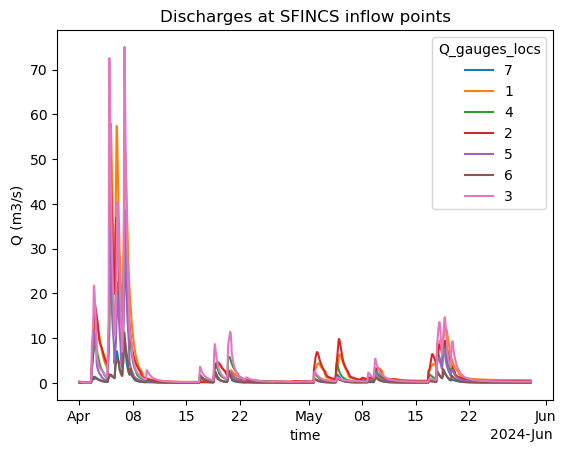

In [45]:
discharges = mod.results['netcdf']
discharges.Q.plot.line(x='time')
plt.title('Discharges at SFINCS inflow points')
plt.ylabel('Q (m3/s)')

In the plot above, the discharges are plotted in the graph above for the points where the rivers enter the SFINCS domain.